In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.layers import Dropout

In [ ]:
path_dir ="/content/drive/MyDrive/data/train"

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.25)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    shuffle=True,
    subset='training',
    color_mode='grayscale')
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    shuffle=True,
    subset='validation',
    color_mode='grayscale')

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(2, activation='softmax') 
]) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(train_generator, batch_size=32,validation_data=validation_generator, validation_steps=100, epochs=200, steps_per_epoch=100, verbose=1, callbacks=[es, mc])


Epoch 1/200
100/100 [==============================] - 144s 1s/step - loss: 0.6602 - accuracy: 0.6037 - val_loss: 0.7202 - val_accuracy: 0.5569

Epoch 00001: val_accuracy improved from -inf to 0.55687, saving model to best_model.h5
Epoch 2/200
100/100 [==============================] - 142s 1s/step - loss: 0.5706 - accuracy: 0.7050 - val_loss: 0.6012 - val_accuracy: 0.6897

Epoch 00002: val_accuracy improved from 0.55687 to 0.68969, saving model to best_model.h5
Epoch 3/200
100/100 [==============================] - 142s 1s/step - loss: 0.4574 - accuracy: 0.7841 - val_loss: 0.5495 - val_accuracy: 0.7334

Epoch 00003: val_accuracy improved from 0.68969 to 0.73344, saving model to best_model.h5
Epoch 4/200
100/100 [==============================] - 145s 1s/step - loss: 0.4107 - accuracy: 0.8178 - val_loss: 0.6493 - val_accuracy: 0.7097

Epoch 00004: val_accuracy did not improve from 0.73344
Epoch 5/200
100/100 [==============================] - 140s 1s/step - loss: 0.3606 - accuracy: 0.8

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


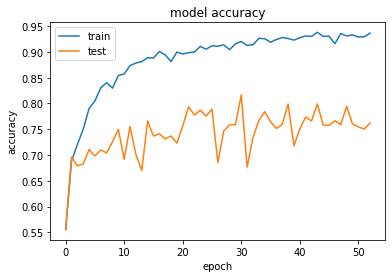

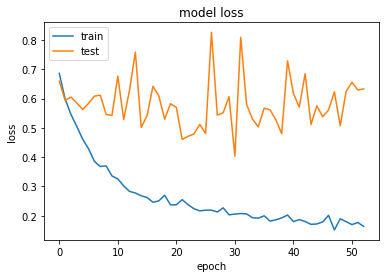

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()